In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Let us start with data cleaning 
# Define the functions that remove all unnecessary elements in the text content 

def char_counts(data):
	split_tweets = [i.split() for i in data]
	word_number = [len(i) for i in split_tweets]
	word_lengths = [[len(j) for j in i] for i in split_tweets]
	mean_word_length = [np.mean(i) for i in word_lengths]
	max_word_length = [np.max(i) for i in word_lengths]
	min_word_length = [np.min(i) for i in word_lengths]
	std_word_length = [np.std(i) for i in word_lengths]
    
	counts = pd.DataFrame(np.array([word_number, mean_word_length,max_word_length,min_word_length,std_word_length]).T,
             columns=["Word Numb", "Char Mean","Char Min","Char Max","Char Std"])
    
	return(counts)

import string

common_words = open("1000CWs.txt", encoding="utf8").read()

def uncommon(data, common_words):
    uncommon_words = []
    
    for word in data.split():
        if word not in common_words: 
            uncommon_words.append(word)
    return(' '.join(uncommon_words))
    


# Usage: uncommon(data, common_words) where the common_words file can be downloaded from the git hub. 

def find_hash(data):
	# Expects a dataframe with a .text column containing the tweets
	# Find hash returns a dataframe with two columns, one for each tweet:: 
	# Hashtags - a string containing the hashtags seperated by spaces
	# Hashcount - the number of hashtags in the tweet
    
	hashtags = [re.findall(r"#(\w+)", i) for i in data]
	hashstring = [' '.join(i) for i in hashtags]
	num_hashtags = [len(i) for i in hashtags]
    
	hash_dict = {"Hashtags": hashstring, "Hashcount": num_hashtags}
	hashinfo = pd.DataFrame(hash_dict)
    
	return(hashinfo)

#lower string
def lowercase(data):
    data = str.lower(data)
    return data 

#remove punctuation
def no_punctuation(data):
    punc = '''!()-[]{};:'"\,<>./?$%^=+&0123456789*_~''' #We don't remove @ or # yet 
    no_punc=''
    for char in data:
        if char in punc:
            data = data.replace(char, ' ')
    return data 
            

#remove @name
def no_name(data): 
    words = data.split() 
    output = []
    i = 0 
    h = '@'
    while i < len(words): 
        if h not in words[i]: 
            output.append(words[i])
        i = i+1 
    return ' '.join(output)


#remove hashtags
def no_hashtag(data): 
    words = data.split() 
    output = []
    i = 0 
    h = '#'
    while i < len(words): 
        if h not in words[i]: 
            output.append(words[i])
        i = i+1 
    return ' '.join(output)

#remove emoji
import re
def no_emoji(data):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data)

#remove non English words
def no_nonEng(data): 
    words = data.split()
    nonEng = 'àâæçèéêîœ'
    i = 0
    nonword = []
    while i < len(words): 
        for char in words[i]: 
            if char in nonEng: 
                nonword.append(words[i])
        i = i+1 
    return ' '.join(list(set(words) - set(nonword)))
                

import re
def remove_url(data):
    result = re.sub(r"http\S+", "", data)
    
    return result



def clean_string(data):
    return(data.apply(lambda x: no_nonEng(no_hashtag(no_emoji(no_name(no_punctuation(lowercase(x))))))))

def parse_url(data):
    noUrl = data.apply(lambda x: remove_url(x))
    urls = [re.findall(r"http\S+", i) for i in data]
    num_urls = [len(i) for i in urls]
    
    url_dict = {"No Urls": noUrl, "URLcount": num_urls}
    urlinfo = pd.DataFrame(url_dict)
    
    return(urlinfo)


In [3]:
#We need to define the features and select the most significant features 
#Features: 
#word count : the number of words on each cleaned twitter
#Char count:the number of characters on each cleaned twitter 
#Char mean: average character count in words
#Char min: the minimum of character count
#Char max : the maximum of character count 
#URLcount : the number of URL used in each twitter 
#Hashcount : the number of Hashtags 
#uncommoncount: the number of uncommon words 
def clean_tweets(data):
   
    # Clean Some Tweests
    hashdata = find_hash(data.text)
    urldata = parse_url(data.text)
    

    cleaned = clean_string(urldata['No Urls'])
    word_count = char_counts(cleaned)
    char_count = [len(i) for i in cleaned]
    
    uwords = [uncommon(i,common_words.split('\n')) for i in cleaned] #uncommon words
    uwordscount = [len(i.split()) for i in uwords]
    
    clean_data = {"Cleaned": cleaned, 
                 
                  "Word count": word_count["Word Numb"], 
                  'Char count': char_count,
                  'Char Mean': word_count['Char Mean'],
                  'Char Min':word_count['Char Min'],
                  'Char Max':word_count['Char Max'],
                 
                  "URLcount": urldata["URLcount"],
                  "Hashtags": hashdata["Hashtags"],
                  "Hashcount": hashdata["Hashcount"],
                  "Uncommon": uwords,
                 'Uncommoncount':uwordscount}
  
    return(pd.DataFrame(clean_data))

In [4]:
#Load the data and show a few examples 
filename = "C:/Users/Mobiu/Documents/collage/2020Spring/Machine learning club/NLP/train.csv"
filename2 = "C:/Users/Mobiu/Documents/collage/2020Spring/Machine learning club/NLP/test.csv"

data_train = pd.read_csv(filename)
data_test = pd.read_csv(filename2)

clean_train = clean_tweets(data_train)

# Add Keyword, location and target columns to the dataframe
clean_train = clean_train.assign(Keyword = data_train['keyword'],location = data_train['location'],target = data_train['target'])
clean_train.head()


,Cleaned,Word count,Char count,Char Mean,Char Min,Char Max,URLcount,Hashtags,Hashcount,Uncommon,Uncommoncount,Keyword,location,target
0,this reason of the allah all deeds our may are...,12.0,57,3.833333,7.0,2.0,0,earthquake,1,allah deeds forgive,3,NaN,NaN,1
1,la canada fire sask near forest ronge,7.0,37,4.428571,6.0,2.0,0,,0,la canada sask ronge,4,NaN,NaN,1
2,notified orders residents no asked in officers...,18.0,109,5.111111,10.0,2.0,0,,0,notified orders residents asked officers being...,9,NaN,NaN,1
3,people orders california evacuation receive in,6.0,46,6.833333,10.0,2.0,0,wildfires,1,orders california evacuation,3,NaN,NaN,1
4,a just this pours from as school smoke photo s...,13.0,63,3.923077,6.0,1.0,0,Alaska wildfires,2,pours smoke photo into ruby,5,NaN,NaN,1


0    4342
1    3271
Name: target, dtype: int64

Text(0.5, 1, 'Correlation for fake disaster')

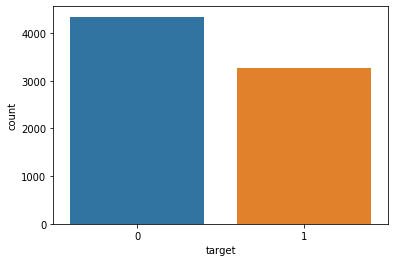

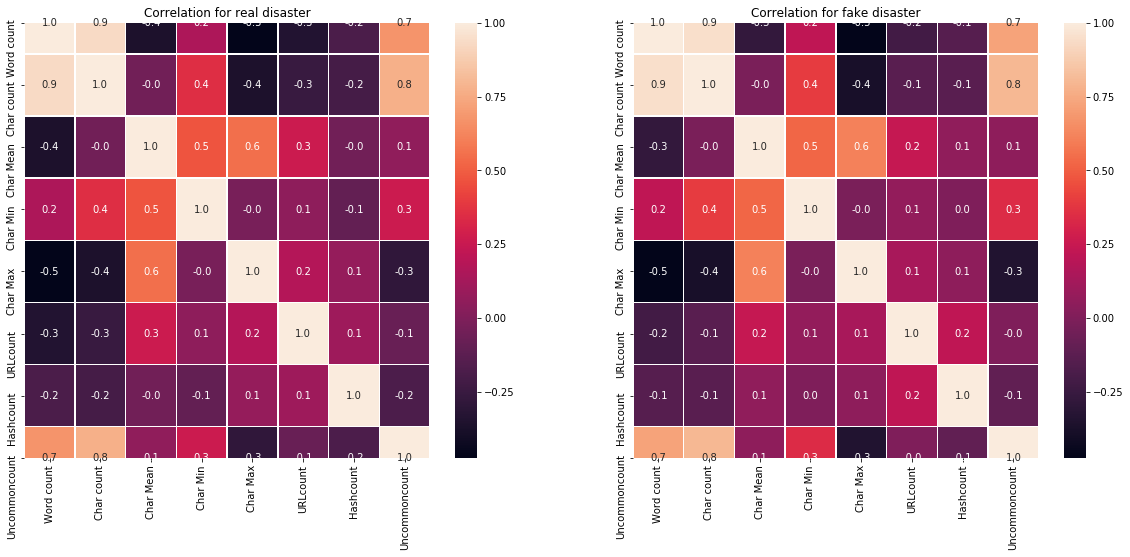

In [5]:
# Set up input matrix X 
X_train = clean_train.drop(columns = ['Cleaned','Hashtags','Uncommon','Keyword','location','target'])

# Normalize feature data by centering on the mean and dividing by std
X_train = (X_train - X_train.mean())/X_train.std()

#Set Up Target Variables y
y_train = data_train['target']

display(y_train.value_counts())
display(sns.countplot(y_train))

# Display the heatmap of the correlations between each features 
y_T = y_train == 1 
y_F = y_train == 0

vmax = max(X_train[y_T].corr().max().max() , X_train[y_F].corr().max().max())
vmin = min(X_train[y_T].corr().min().min() , X_train[y_F].corr().min().min())

f,axes = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(X_train[y_T].corr(),annot=True,linewidth=.5, fmt='.1f',ax = axes[0],vmax = vmax, vmin=vmin)
sns.heatmap(X_train[y_F].corr(),annot=True,linewidth=.5, fmt='.1f',ax = axes[1],vmax = vmax, vmin=vmin)

axes[0].set_title('Correlation for real disaster')
axes[1].set_title('Correlation for fake disaster')

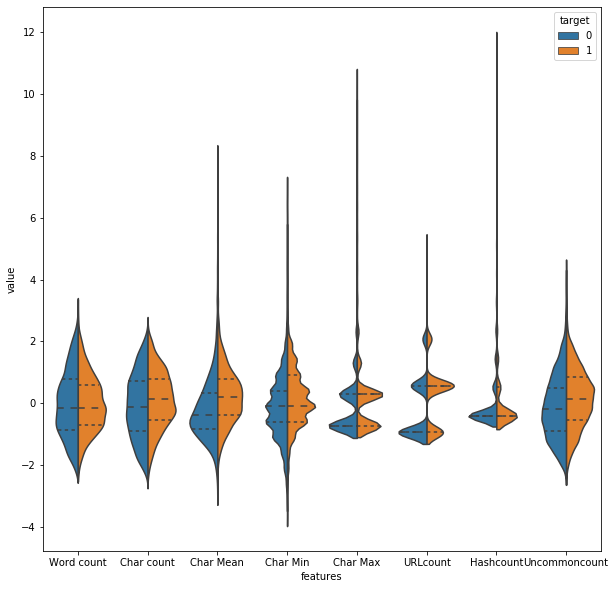

In [8]:
# Use the violin plot to select the most significant features 
vio = pd.concat([y_train,X_train],axis= 1)
vio = pd.melt(vio,id_vars="target", 
                    var_name="features",
                    value_name='value')  

f,ax = plt.subplots(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=vio,split=True, inner="quart")


In [9]:
# It looks like there are some linear correlation between features Char count, word count and uncommon count
# Do the logistic regression to those three features 

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
x_charword = X_train[['Char count','Word count']]
LR.fit(x_charword,data_train['target'])
print('The r^2 between char count and word count is ', LR.score(x_charword,data_train['target']))

x_charuncommon = X_train[['Char count','Uncommoncount']]
LR.fit(x_charuncommon,data_train['target'])
print('The r^2 between char count and uncommon count is ',LR.score(x_charuncommon,data_train['target']))

x_worduncommon = X_train[['Word count','Uncommoncount']]
LR.fit(x_worduncommon,data_train['target'])
print('The r^2 between word count and uncommon count is ',LR.score(x_worduncommon,data_train['target']))



The r^2 between char count and word count is  0.6331275449888348
The r^2 between char count and uncommon count is  0.5691580191777224
The r^2 between word count and uncommon count is  0.6056745041376592


C:\Users\Mobiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mobiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mobiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# Define a function for training the neural network 
# The one hot encode is on the word level, so the size of the input should be (N, MAX_LEN, DIC_LEN)
# where MAX_LEN represents the maximum number of words of a sentence, DIC_LEN represents the total number of words have been used in the training set 
def word_encoder(clean_text,targets,frac=.8):
    ## Train-test split:
    train_df = clean_text.sample(frac = frac, replace=False)
    y_train = targets.iloc[train_df.index] 
    
    test_df = clean_text.drop(train_df.index)
    y_test = targets.drop(train_df.index)
    
    # Construct Word List
    wordvector_tr = [s.split() for s in list(train_df)]
    TRN_LEN = len(wordvector_tr) # The number of twitters in the training set 
    
    wordvector_te = [s.split() for s in list(test_df)]
    TES_LEN = len(wordvector_te) # The number of twitters in the testing set 

    lens = [len(s.split()) for s in list(clean_text)]
    MAX_LEN = max(lens) # The maximum length of twitters in the original set 

    wordlist = sorted(list(set([w for s in list(clean_text) for w in s.split()])))
    
    DIC_LEN = len(wordlist) #The total number of unique vocabs
    
    # Construct Dictionary
    word_indices = dict((c, i) for i, c in enumerate(wordlist))
    indices_word = dict((i, c) for i, c in enumerate(wordlist))
    
    # Construct Training and Test Sets
    x_train = np.zeros((TRN_LEN,MAX_LEN,DIC_LEN),dtype=np.bool)
    x_test = np.zeros((TES_LEN,MAX_LEN,DIC_LEN),dtype=np.bool)
    
    for i, sentance in enumerate(wordvector_tr):
        for t, word in enumerate(sentance):
            x_train[i,t, word_indices[word]] = 1
        
    for i, sentance in enumerate(wordvector_te):
        for t, word in enumerate(sentance):
            x_test[i,t, word_indices[word]] = 1
            
    encode = {"data": [x_train, y_train, x_test, y_test],
              "word_indices": word_indices,
              "indices_word": indices_word,
              "TRN_LEN": TRN_LEN,
              "TES_LEN": TES_LEN,
              "MAX_LEN": MAX_LEN,
              "DIC_LEN": DIC_LEN,
              "indicies": train_df.index}
            
    return(encode)

In [11]:
# Do the one hot encode for the training set (word level)
encode = word_encoder(clean_train['Cleaned'],data_train['target'])
[x_train,y_train,x_test,y_test] = encode["data"]

display(x_train.shape)
display(y_train.shape)

(6090, 29, 13446)

(6090,)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM, Flatten,Activation
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback, ModelCheckpoint

model= Sequential()


model.add(LSTM(64, return_sequences=True, input_shape = (encode['MAX_LEN'],encode['DIC_LEN']))) 
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(32,return_sequences = False))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))


optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 29, 64)            3458816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 29, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 29, 64)            33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 29, 64)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# define the checkpoint
filepath = "Wordweights.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

model.fit(x_train, pd.get_dummies(y_train),
          batch_size=32,
          epochs=5,
          verbose=1,
          validation_data = (x_test, pd.get_dummies(y_test)),
          callbacks=[checkpoint])

In [23]:
# Find the mmaximum of output, the correspoending index should be the result (0 = not real disaster, 1 = real disaster)
def realornot(data): 
    real = int(data.index(max(data)))
    return real
        

# Give an example 
example = x_train[0:100,:,:]
y_example = model.predict(example).tolist() 
result = [realornot(i) for i in y_example]
print(result)

# Calculate the accuracy by hand compared to real target values 
example_target = list(y_train[0:100])

#Define a function to calculate the accuracy 
def acc(x,y):
    output = 0
    i = 0
    match = 0
    while i < len(x): 
        if x[i] == y[i]: 
            match += 1
        i+=1
    return match/len(x)
print(example_target)
example_acc = acc(result,example_target)
print('The accuracy is ', example_acc)

[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
The accuracy is  0.99
